# Devices Price Classification System using Python and Spring Boot


Dataset columns are as follows:
*  id - ID
*  battery_power - Total energy a battery can store in one time measured in mAh
*  blue - Has Bluetooth or not
*  clock_speed - The speed at which the microprocessor executes instructions
*  dual_sim - Has dual sim support or not
*  fc - Front Camera megapixels
*  four_g - Has 4G or not
*  int_memory - Internal Memory in Gigabytes
*  m_dep - Mobile Depth in cm
*  mobile_wt - Weight of mobile phone
*  n_cores - Number of cores of the processor
*  pc - Primary Camera megapixels
*  px_height - Pixel Resolution Height
*  px_width - Pixel Resolution Width
*  ram - Random Access Memory in Megabytes
*  sc_h - Screen Height of mobile in cm
*  sc_w - Screen Width of mobile in cm
*  talk_time - longest time that a single battery charge will last when you are
*  three_g - Has 3G or not
*  touch_screen - Has touch screen or not
*  wifi - Has wifi or not
*  price_range - This is the target variable with the value of:
    0 (low cost)
    1 (medium cost)
    2 (high cost)
    3 (very high cost)


In [1]:
# Import necessary libraries for data manipulation, numerical computations, and data visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import seaborn as sb  # Data visualization (statistical graphics)
import matplotlib.pyplot as plt  # Plotting library

In [4]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("/kaggle/input/train-dataset/train - train (1).csv")

# Display the first few rows of the DataFrame to understand its structure and preview the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [5]:
# Check for missing values in the dataset
# This will return the count of null (missing) values for each column in the DataFrame
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Drop rows where all values are null
df_cleaned = df.dropna(how='all')

In [ ]:
# Check for missing values in the dataset
# This will return the count of null (missing) values for each column in the DataFrame
df.isnull().sum()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               1995
four_g           1995
int_memory       1995
m_dep            1995
mobile_wt        1996
n_cores          1996
pc               1995
px_height        1996
px_width         1998
ram              1998
sc_h             1999
sc_w             1999
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [8]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1561
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# Import the scatter_matrix function from pandas for visualizing pairwise relationships in a dataset
from pandas.plotting import scatter_matrix

# Compute the correlation matrix for the DataFrame, considering only numeric columns
matrix = df.corr(numeric_only=True)

# Sort the correlation values of the 'price_range' column in descending order
# This helps to identify which features are most strongly correlated with the target variable 'price_range'
target = matrix["price_range"].sort_values(ascending=False)

# Display the sorted correlation values
target

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

In [11]:
# Loop through each unique value in the 'price_range' column
for value in df["price_range"].unique():
    # Print the current price range
    print(f"Price Range {value}")
    
    # Print a header for Bluetooth counts
    print("Bluetooth counts")
    
    # Filter the DataFrame for the current price range
    # Count the occurrences of each unique value in the 'blue' column (Bluetooth feature)
    # Print the value counts for Bluetooth in the current price range
    print(df[df["price_range"] == value]["blue"].value_counts())

Price Range 1
Bluetooth counts
blue
0    255
1    245
Name: count, dtype: int64
Price Range 2
Bluetooth counts
blue
0    257
1    243
Name: count, dtype: int64
Price Range 3
Bluetooth counts
blue
1    259
0    241
Name: count, dtype: int64
Price Range 0
Bluetooth counts
blue
0    257
1    243
Name: count, dtype: int64


In [12]:
# Loop through each unique value in the 'price_range' column
for value in df["price_range"].unique():
    # Print the current price range
    print(f"Price Range {value}")
    
    # Print a header for Wifi counts
    print("Wifi counts")
    
    # Filter the DataFrame for the current price range
    # Count the occurrences of each unique value in the 'wifi' column (Wifi feature)
    # Print the value counts for Wifi in the current price range
    print(df[df["price_range"] == value]["wifi"].value_counts())

Price Range 1
Wifi
wifi
1    252
0    248
Name: count, dtype: int64
Price Range 2
Wifi
wifi
1    252
0    248
Name: count, dtype: int64
Price Range 3
Wifi
wifi
1    262
0    238
Name: count, dtype: int64
Price Range 0
Wifi
wifi
0    252
1    248
Name: count, dtype: int64


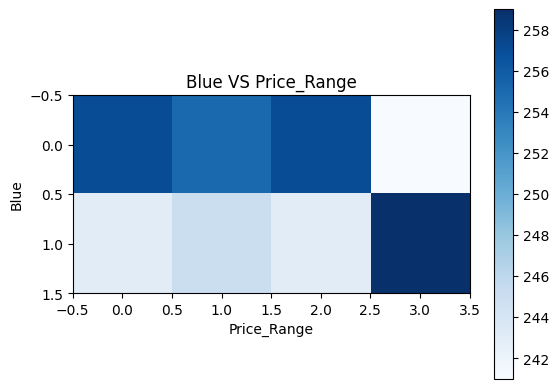

In [13]:
# Create a cross-tabulation table of the 'blue' column (Bluetooth feature) and the 'price_range' column
cm = pd.crosstab(df["blue"], df["price_range"])

# Display the cross-tabulation table as an image using a heatmap
plt.imshow(cm, cmap="Blues")

# Add a title to the heatmap
plt.title("Blue VS Price_Range")

# Label the x-axis as 'Price_Range'
plt.xlabel("Price_Range")

# Label the y-axis as 'Blue'
plt.ylabel("Blue")

# Add a color bar to the heatmap to indicate the scale
plt.colorbar()

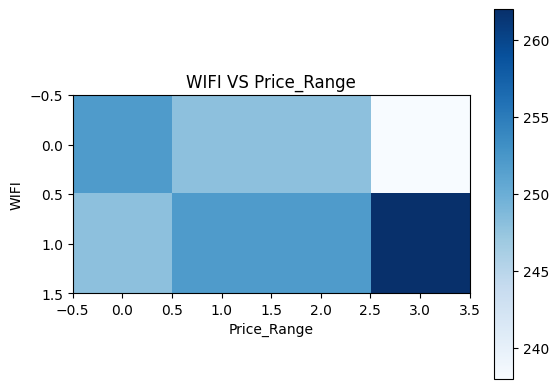

In [14]:
# Create a cross-tabulation table of the 'wifi' column (Wifi feature) and the 'price_range' column
cm = pd.crosstab(df["wifi"], df["price_range"])

# Display the cross-tabulation table as an image using a heatmap
plt.imshow(cm, cmap="Blues")

# Add a title to the heatmap
plt.title("WIFI VS Price_Range")

# Label the x-axis as 'Price_Range'
plt.xlabel("Price_Range")

# Label the y-axis as 'WIFI'
plt.ylabel("WIFI")

# Add a color bar to the heatmap to indicate the scale
plt.colorbar()

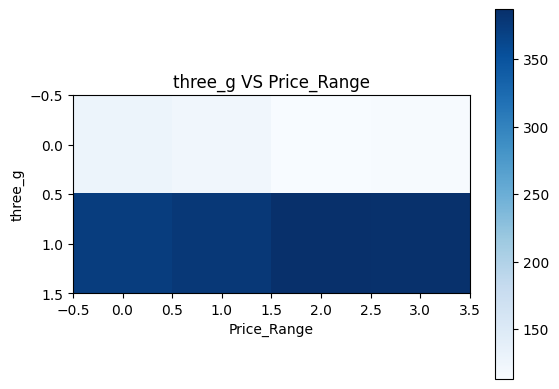

In [15]:
# Create a cross-tabulation table of the 'three_g' column (3G feature) and the 'price_range' column
cm = pd.crosstab(df["three_g"], df["price_range"])

# Display the cross-tabulation table as an image using a heatmap
plt.imshow(cm, cmap="Blues")

# Add a title to the heatmap
plt.title("three_g VS Price_Range")

# Label the x-axis as 'Price_Range'
plt.xlabel("Price_Range")

# Label the y-axis as 'three_g'
plt.ylabel("three_g")

# Add a color bar to the heatmap to indicate the scale
plt.colorbar()

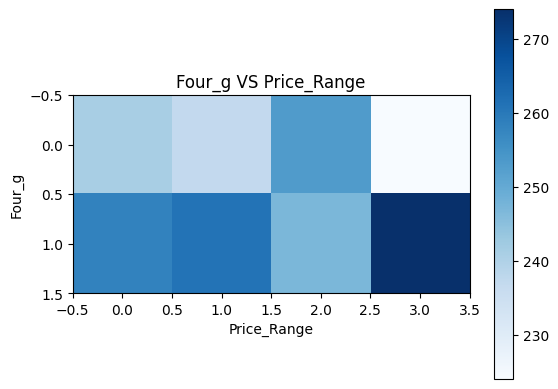

In [16]:
# Create a cross-tabulation table of the 'four_g' column (4G feature) and the 'price_range' column
cm = pd.crosstab(df["four_g"], df["price_range"])

# Display the cross-tabulation table as an image using a heatmap
plt.imshow(cm, cmap="Blues")

# Add a title to the heatmap
plt.title("Four_g VS Price_Range")

# Label the x-axis as 'Price_Range'
plt.xlabel("Price_Range")

# Label the y-axis as 'Four_g'
plt.ylabel("Four_g")

# Add a color bar to the heatmap to indicate the scale
plt.colorbar()

/tmp/ipykernel_33/728630090.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Price Range")


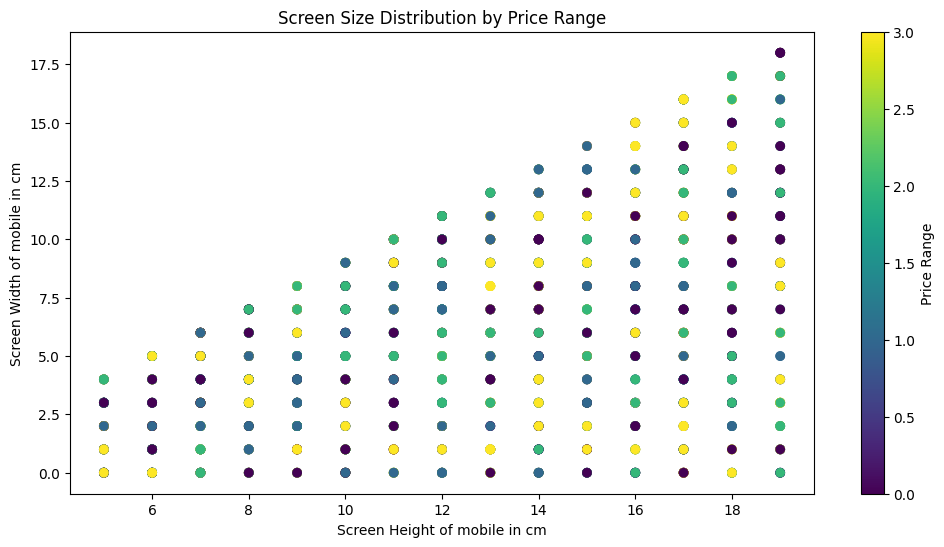

In [17]:
# Create a scatter plot to visualize the distribution of screen sizes by price range
plt.figure(figsize=(12, 6))
plt.scatter(x=df["sc_h"], y=df["sc_w"], c=df["price_range"], cmap="viridis")

# Label the x-axis as 'Screen Height of mobile in cm'
plt.xlabel("Screen Height of mobile in cm")

# Label the y-axis as 'Screen Width of mobile in cm'
plt.ylabel("Screen Width of mobile in cm")

# Add a title to the plot
plt.title("Screen Size Distribution by Price Range")

# Create a colorbar to indicate the price range
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(min(df["price_range"]), max(df["price_range"])))
sm.set_array([])
plt.colorbar(sm, label="Price Range")

# Display the plot
plt.show()


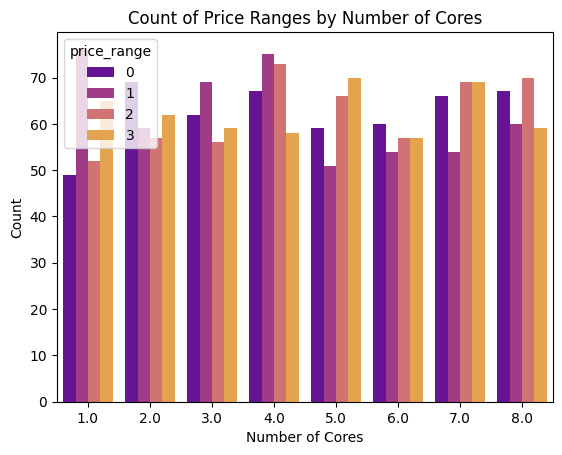

In [18]:
# Create a count plot to visualize the count of price ranges by number of cores
sb.countplot(x="n_cores", hue="price_range", data=df, palette="plasma")

# Label the x-axis as 'Number of Cores'
plt.xlabel("Number of Cores")

# Label the y-axis as 'Count'
plt.ylabel("Count")

# Add a title to the plot
plt.title("Count of Price Ranges by Number of Cores")

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


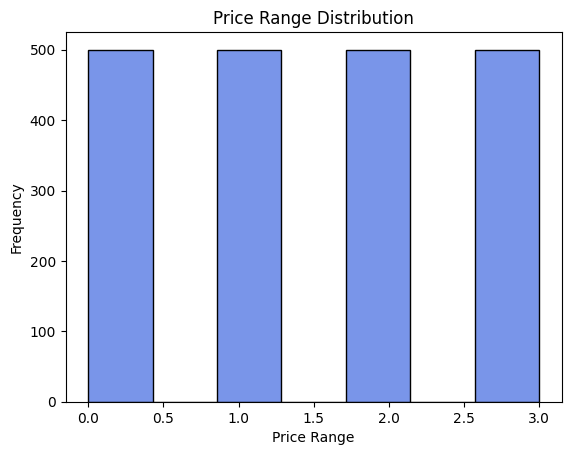

In [19]:
# Create a histogram to visualize the distribution of price ranges
sb.histplot(data=df, x="price_range", bins=7, color='royalblue', alpha=0.7)

# Add a title to the plot
plt.title("Price Range Distribution")

# Label the x-axis as 'Price Range'
plt.xlabel("Price Range")

# Label the y-axis as 'Frequency'
plt.ylabel("Frequency")

# Display the plot
plt.show()

***Conclution: the data is distrubited***

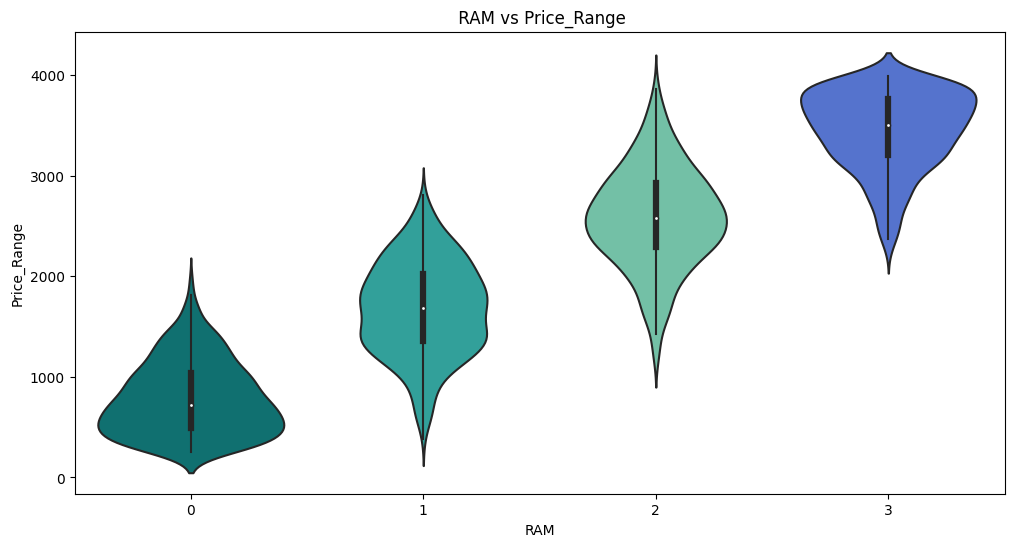

In [100]:
# Define a custom color palette for the violin plot
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

# Create a violin plot to visualize the distribution of RAM by price range
plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="ram", data=df, palette=palette)

# Add a title to the plot
plt.title("RAM vs Price_Range")

# Label the x-axis as 'RAM'
plt.xlabel("RAM")

# Label the y-axis as 'Price_Range'
plt.ylabel("Price_Range")

# Display the plot
plt.show()


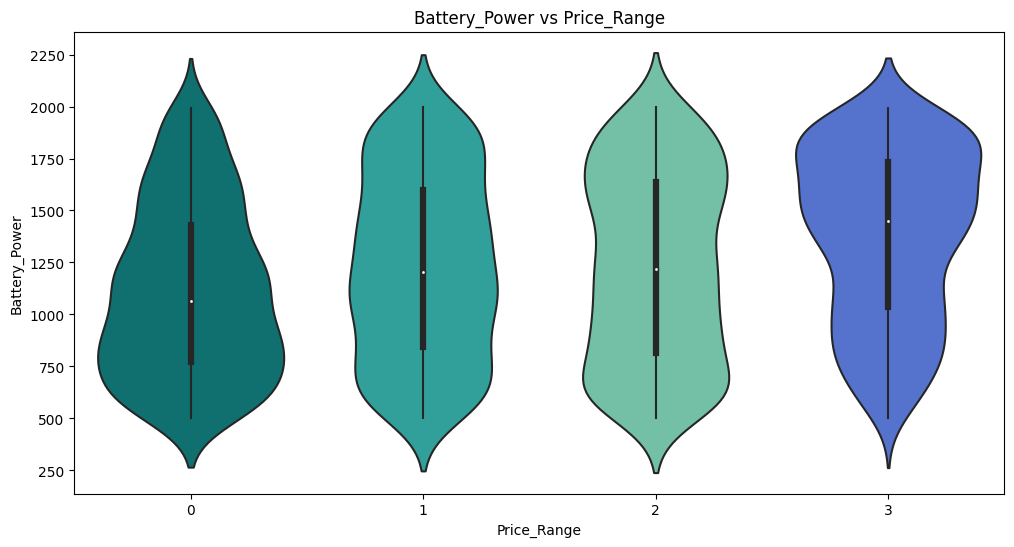

In [29]:
# Define a custom color palette for the violin plot
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

# Create a violin plot to visualize the distribution of battery power by price range
plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="battery_power", data=df, palette=palette)

# Add a title to the plot
plt.title("Battery_Power vs Price_Range")

# Label the x-axis as 'Price_Range'
plt.xlabel("Price_Range")

# Label the y-axis as 'Battery_Power'
plt.ylabel("Battery_Power")

# Display the plot
plt.show()

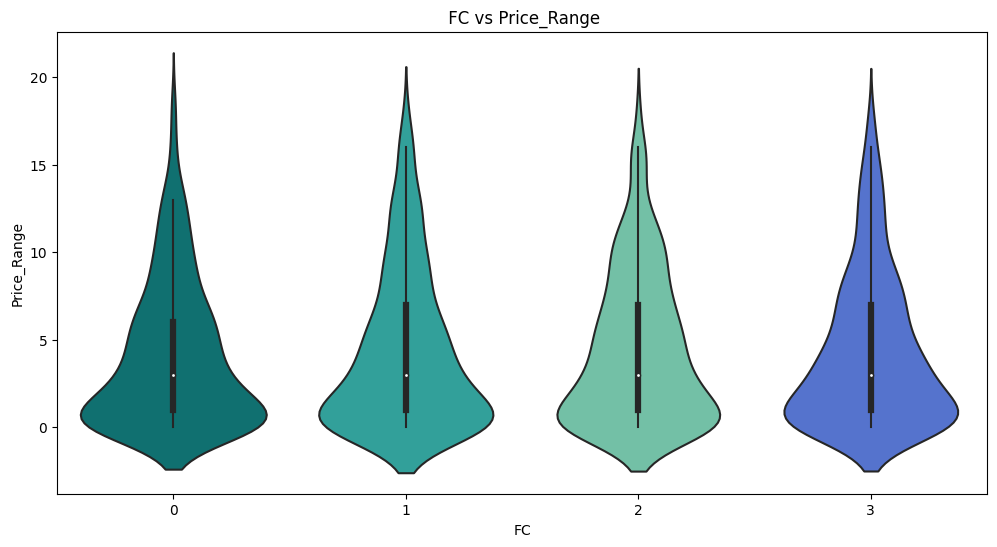

In [99]:
# Define a custom color palette for the violin plot
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

# Create a violin plot to visualize the distribution of front camera megapixels by price range
plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="fc", data=df, palette=palette)

# Add a title to the plot
plt.title("FC vs Price_Range")

# Label the x-axis as 'FC' (Front Camera)
plt.xlabel("FC")

# Label the y-axis as 'Price_Range'
plt.ylabel("Price_Range")

# Display the plot
plt.show()

## Conclusion:
In conclusion, none of the phone's features besides RAM stand out significantly.

To improve the baseline model, we can create new features based on existing data. These features include:

Screen area: This is calculated by multiplying the screen height by the screen width.
Pixel density: This is calculated by dividing the product of the pixel width and pixel height by the screen area.
Battery efficiency: This is calculated by dividing the talk time by the battery life.
Camera resolution: This is calculated by multiplying the front camera resolution by the rear camera resolution (assuming "fc" refers to front camera and "pc" refers to rear camera).
By incorporating these new features, we can assess their impact on the model's performance.



In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(y_true, y_predicted):
    """
    This function evaluates a classification model by printing classification report
    and plotting the confusion matrix.

    Args:
        y_true (array-like): True labels for the classification task.
        y_predicted (array-like): Predicted labels for the classification task.
    """

    # Print classification report
    print(classification_report(y_true, y_predicted))

    # Generate confusion matrix
    cf_matrix = confusion_matrix(y_true, y_predicted)

    # Create ConfusionMatrixDisplay object
    cmd = ConfusionMatrixDisplay(cf_matrix)

    # Plot the confusion matrix
    cmd.plot()
    plt.show()

In [37]:
from sklearn.pipeline import Pipeline  # Import Pipeline class for creating a data processing pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import preprocessing modules for scaling and encoding
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer for applying transformations to different columns
from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting data into training and testing sets

In [38]:
X = df.drop("price_range", axis=1)  # Extract features (X) by dropping the target column
y = df["price_range"]  # Extract target variable (y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

# Print the distribution of target variable in training set
print(f"Train distribution {y_train.value_counts() / len(y_train)}")

# Print the distribution of target variable in validation set
print(f"Validation distribution {y_val.value_counts() / len(y_val)}")

Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [39]:
# Define categorical features in the dataset
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g", "touch_screen", "wifi"]

# Identify numerical features by excluding categorical features from all columns
numerical_features = [col for col in X.columns if col not in categorical_features]

In [40]:
# Define a pipeline for processing categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent term
    ('encoder', OneHotEncoder())  # Perform one-hot encoding
])

In [41]:
# Define a pipeline for processing numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Perform standard scaling
])

In [43]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [44]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)


### 1. Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier for building decision tree models

In [57]:
# Train a Decision Tree Classifier model with a maximum depth of 10
dtc = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

# Print the accuracy of the model on the training set
print('Accuracy For (Training): {:.2f}'.format(dtc.score(X_train, y_train)))

# Print the accuracy of the model on the validation set
print('Accuracy For (Test): {:.2f}'.format(dtc.score(X_val, y_val)))

Acc For (Training): 1.00
Acc For (Training): 0.83


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       120
           1       0.76      0.80      0.78        95
           2       0.77      0.81      0.79        90
           3       0.89      0.92      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



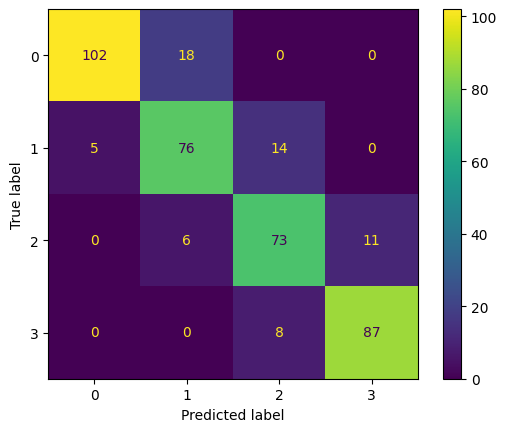

In [54]:
# Make predictions on the validation set using the trained Decision Tree Classifier
y_preds = dtc.predict(X_val)

# Evaluate the model using the custom function evaluate_model
evaluate_model(y_val, y_preds)

### 2. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Acc For (Training)',forest_reg.score(X_train,y_train))
print('Acc For (Test) ',forest_reg.score(X_val,y_val))

Acc For (Training) 0.915
Acc For (Test)  0.795


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       120
           1       0.72      0.72      0.72        95
           2       0.69      0.66      0.67        90
           3       0.82      0.89      0.85        95

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



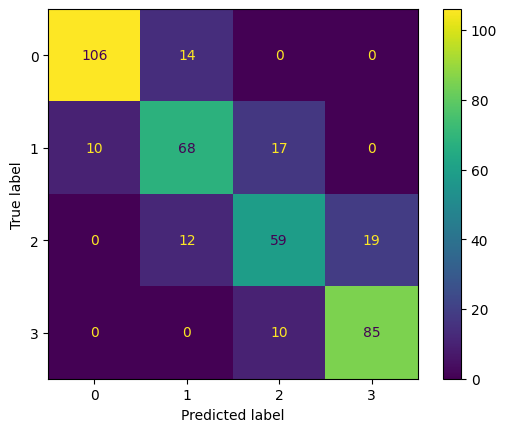

In [59]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

### 3. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The acc of the K-nearest neighbors Model is',score_knn)

The acc of the K-nearest neighbors Model is 0.67


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       120
           1       0.53      0.57      0.55        95
           2       0.50      0.60      0.55        90
           3       0.84      0.68      0.76        95

    accuracy                           0.67       400
   macro avg       0.68      0.66      0.67       400
weighted avg       0.69      0.67      0.68       400



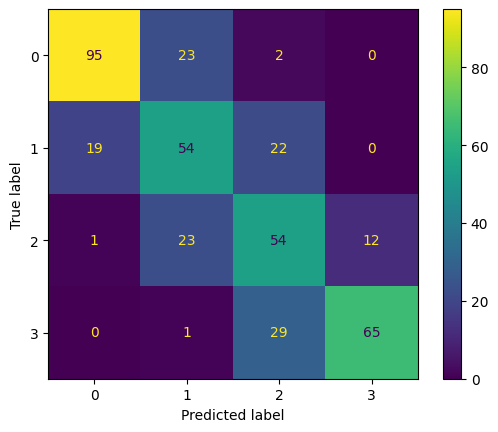

In [65]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

### 4. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

log_clf.fit(X_train,y_train)


print('Acc For (Training):' , log_clf.score(X_train, y_train))
print('Acc For (Test):' , log_clf.score(X_val, y_val))

Acc For (Training): 0.85375
Acc For (Test): 0.84


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       120
           1       0.74      0.68      0.71        95
           2       0.69      0.64      0.67        90
           3       0.90      0.99      0.94        95

    accuracy                           0.84       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.84      0.84       400



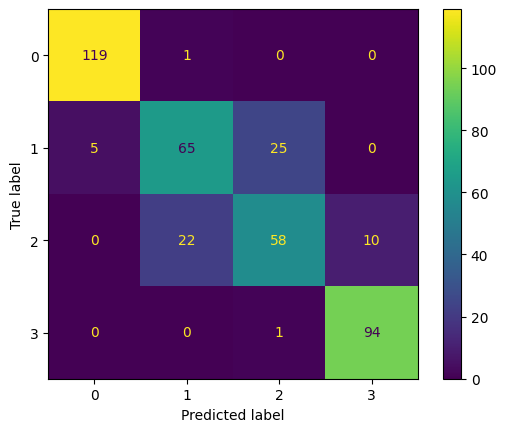

In [68]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

### 5. SVC

In [69]:
from sklearn.svm import SVC

In [72]:
C = 1.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Acc For (Training): {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Acc For (Test): {:.2f}'
     .format(clfc.score(X_val, y_val)))

Acc For (Training): 0.98
Acc For (Test): 0.95


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       120
           1       0.95      0.93      0.94        95
           2       0.93      0.93      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



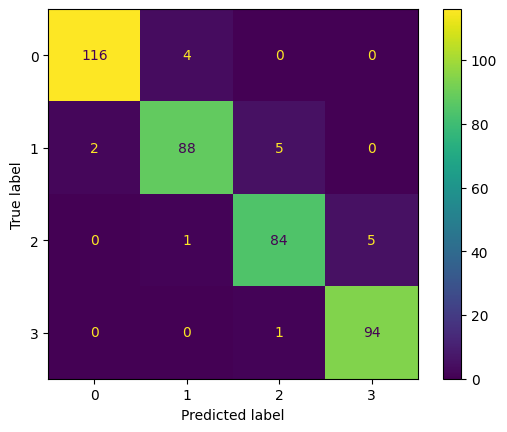

In [73]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

Conclution: the Support Vector Machine (SVM) achieved the most promising results. I will now focus on further optimizing it with two approaches:

* Hyperparameter Tuning: I will first feed the data directly into the model and utilize randomized search followed by grid search to identify the best hyperparameter configuration.
* Feature Engineering: After hyperparameter tuning, I will explore feature engineering techniques to potentially improve performance further.

In [74]:
test_df = pd.read_csv("/kaggle/input/test-test-dataset/test - test (1).csv")
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [75]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [77]:
test_df.count()

id               1000
battery_power    1000
blue             1000
clock_speed      1000
dual_sim         1000
fc               1000
four_g           1000
int_memory       1000
m_dep            1000
mobile_wt        1000
n_cores          1000
pc               1000
px_height        1000
px_width         1000
ram              1000
sc_h             1000
sc_w             1000
talk_time        1000
three_g          1000
touch_screen     1000
wifi             1000
dtype: int64

In [78]:
test_df.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [79]:
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [80]:
train_df = pd.read_csv("/kaggle/input/train-dataset/train - train (1).csv")
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [81]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [82]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [83]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [84]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [85]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [86]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)


In [88]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Acc For (Training): {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Acc For (Test): {:.2f}'
     .format(clfc.score(X_val, y_val)))

Acc For (Training): 0.99
Acc For (Test): 0.97


In [89]:
X_test = test_df.drop("id",axis=1)
X_test = X_test[list(X.columns)]

X_test = preprocessor.transform(X_test)
y_test_preds = clfc.predict(X_test)

In [90]:
test_df["price_range"] = y_test_preds

In [91]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [1]:
pip install pandas scikit-learn Flask

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# تحميل النموذج المدرب
model = joblib.load('/kaggle/input/model_pkl/other/best_svm_model.pkl/1/best_svm_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = [data['battery_power'], data['blue'], data['clock_speed'], data['dual_sim'], 
                data['fc'], data['four_g'], data['int_memory'], data['m_dep'], data['mobile_wt'], 
                data['n_cores'], data['pc'], data['px_height'], data['px_width'], data['ram'], 
                data['sc_h'], data['sc_w'], data['talk_time'], data['three_g'], data['touch_screen'], 
                data['wifi']]
    prediction = model.predict([features])[0]
    return jsonify({'price_range': prediction})

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


In [ ]:
from sklearn.externals import joblib

# التدريب على البيانات وحفظ النموذج
# model = تدريب النموذج هنا
joblib.dump(model, '/kaggle/input/model_pkl/other/best_svm_model.pkl/1/best_svm_model.pkl')


In [ ]:
python app.py

In [ ]:
src/main/java/com/example/devicepriceclassification
├── DevicePriceClassificationApplication.java
├── controller
├── model
├── repository
├── service

In [ ]:
package com.example.devicepriceclassification.model;

import javax.persistence.Entity;
import javax.persistence.GeneratedValue;
import javax.persistence.GenerationType;
import javax.persistence.Id;

@Entity
public class Device {
    @Id
    @GeneratedValue(strategy = GenerationType.IDENTITY)
    private Long id;

    private int batteryPower;
    private boolean blue;
    private float clockSpeed;
    private boolean dualSim;
    private int fc;
    private boolean fourG;
    private int intMemory;
    private float mDep;
    private int mobileWt;
    private int nCores;
    private int pc;
    private int pxHeight;
    private int pxWidth;
    private int ram;
    private int scH;
    private int scW;
    private int talkTime;
    private boolean threeG;
    private boolean touchScreen;
    private boolean wifi;
    private Integer priceRange;  // هذا الحقل يمكن أن يكون فارغاً في البداية

    // getters and setters
}

In [ ]:
package com.example.devicepriceclassification.repository;

import com.example.devicepriceclassification.model.Device;
import org.springframework.data.jpa.repository.JpaRepository;

public interface DeviceRepository extends JpaRepository<Device, Long> {
}

In [ ]:
package com.example.devicepriceclassification.service;

import com.example.devicepriceclassification.model.Device;
import com.example.devicepriceclassification.repository.DeviceRepository;
import org.springframework.beans.factory.annotation.Autowired;
import org.springframework.stereotype.Service;

import java.util.List;

@Service
public class DeviceService {
    @Autowired
    private DeviceRepository deviceRepository;

    public List<Device> getAllDevices() {
        return deviceRepository.findAll();
    }

    public Device getDeviceById(Long id) {
        return deviceRepository.findById(id).orElse(null);
    }

    public Device saveDevice(Device device) {
        return deviceRepository.save(device);
    }

    public void deleteDevice(Long id) {
        deviceRepository.deleteById(id);
    }
}

In [ ]:
package com.example.devicepriceclassification.controller;

import com.example.devicepriceclassification.model.Device;
import com.example.devicepriceclassification.service.DeviceService;
import org.springframework.beans.factory.annotation.Autowired;
import org.springframework.http.ResponseEntity;
import org.springframework.web.bind.annotation.*;

import java.util.List;

@RestController
@RequestMapping("/api/devices")
public class DeviceController {
    @Autowired
    private DeviceService deviceService;

    @GetMapping
    public List<Device> getAllDevices() {
        return deviceService.getAllDevices();
    }

    @GetMapping("/{id}")
    public Device getDeviceById(@PathVariable Long id) {
        return deviceService.getDeviceById(id);
    }

    @PostMapping
    public Device createDevice(@RequestBody Device device) {
        return deviceService.saveDevice(device);
    }

    @PostMapping("/predict/{id}")
    public ResponseEntity<?> predictPrice(@PathVariable Long id) {
        Device device = deviceService.getDeviceById(id);
        if (device == null) {
            return ResponseEntity.notFound().build();
        }

        // استدعاء خدمة Python لتوقع السعر
        String url = "http://localhost:5000/predict";
        RestTemplate restTemplate = new RestTemplate();
        HttpEntity<Device> request = new HttpEntity<>(device);
        ResponseEntity<Map> response = restTemplate.postForEntity(url, request, Map.class);

        if (response.getStatusCode().is2xxSuccessful()) {
            Integer predictedPrice = (Integer) response.getBody().get("price_range");
            device.setPriceRange(predictedPrice);
            deviceService.saveDevice(device);
            return ResponseEntity.ok(device);
        } else {
            return ResponseEntity.status(response.getStatusCode()).build();
        }
    }
}


In [ ]:
spring.datasource.url=jdbc:h2:mem:testdb
spring.datasource.driverClassName=org.h2.Driver
spring.datasource.username=sa
spring.datasource.password=
spring.jpa.database-platform=org.hibernate.dialect.H2Dialect
spring.h2.console.enabled=true

In [ ]:
mvn spring-boot:run


In [ ]:
curl -X POST http://localhost:8080/api/devices -H "Content-Type: application/json" -d '{
    "batteryPower": 1000,
    "blue": true,
    "clockSpeed": 2.5,
    "dualSim": true,
    "fc": 5,
    "fourG": true,
    "intMemory": 32,
    "mDep": 0.5,
    "mobileWt": 150,
    "nCores": 4,
    "pc": 13,
    "pxHeight": 1920,
    "pxWidth": 1080,
    "ram": 4096,
    "scH": 12,
    "scW": 7,
    "talkTime": 10,
    "threeG": true,
    "touchScreen": true,
    "wifi": true
}'


In [ ]:
curl -X POST http://localhost:8080/api/devices/predict/1